# Data Science Project Workflow

## Project Overview
- **Objective**: Define the problem and goals of the project.
- **Milestones**: Data Collection, Exploration, Preprocessing, Advanced Analysis, Model Development, Deployment, and Final Documentation.

---

## Domain and Research Questions

### Domain of the Project
- [Insert the domain of the project, e.g., Healthcare, Finance, Customer Behavior, etc.]

### Research Questions to be Answered
1. **Question 1**: [Insert research question 1]  
2. **Question 2**: [Insert research question 2]  
3. **Question 3**: [Insert research question 3]  
4. [Add more questions if applicable]

---

# Team Information

## Student Information
- **Name**: [Insert Name]  
- **Email**: [Insert Email]  
- **Role**: Data Science Student  
- **Institution**: [Insert Institution Name]

## Additional Information
- **Project Timeline**: [Insert Start Date - End Date]  
- **Tools Used**: [Insert List of Tools or Frameworks, e.g., Python, SQLite, Pandas, etc.]  
- **Advisor/Instructor**: [Insert Advisor/Instructor Name, if applicable]  
- **Contact for Inquiries**: [Insert Email or Point of Contact]

---

# Milestone 1: Data Collection, Exploration, and Preprocessing

## Data Collection
- Acquire a dataset from reliable sources (e.g., Kaggle, UCI Repository, or APIs).
- **Scraping Data**:
  - Increase dataset size through web scraping or APIs (e.g., Selenium, BeautifulSoup).
  - Explore public repositories or other accessible sources for additional data.

In [22]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException
from bs4 import BeautifulSoup
import pandas as pd
import os
import time

# Suppress warnings from Selenium
import logging
from selenium.webdriver.remote.remote_connection import LOGGER
LOGGER.setLevel(logging.WARNING)


# ===== SETUP =====

service = Service(executable_path="./chromedriver")
options = Options()
# options.add_argument("--headless")
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(service=service, options=options)

brands = ["bmw", "honda", "chevrolet", "toyota", "tesla", "nissan", "ford", "audi", "kia", "hyundai"]
pages_per_brand = 25

all_data = []

for brand in brands:
    print(f"🔍 Scraping brand: {brand.upper()}")
    for page in range(1, pages_per_brand + 1):
        print(f"  → Page {page}")
        url = f"https://www.cars.com/shopping/{brand}/?page={page}"
        driver.get(url)
        time.sleep(4)

        vehicle_cards = driver.find_elements(By.CLASS_NAME, "vehicle-card")

        for card in vehicle_cards:
            try:
                title = card.find_element(By.CLASS_NAME, "title").text
                price = card.find_element(By.CLASS_NAME, "primary-price").text
                mileage = card.find_element(By.CLASS_NAME, "mileage").text
                year = title.split()[0]
            except NoSuchElementException:
                continue

            try:
                spark_reveal = card.find_element(By.TAG_NAME, "spark-reveal")
                driver.execute_script("arguments[0].setAttribute('aria-expanded', 'true')", spark_reveal)
                time.sleep(0.5)
                html_content = spark_reveal.get_attribute("innerHTML")
            except Exception as e:
                print("⚠️ Failed to open 'Show details':", e)
                html_content = ""

            soup = BeautifulSoup(html_content, "html.parser")

            mpg = fuel = transmission = drivetrain = engine = None

            for feature in soup.select(".vehicle-feature"):
                label = feature.text.lower()
                if "mpg:" in label:
                    mpg = feature.text.split(":")[1].strip()
                elif "fuel type" in label:
                    fuel = feature.text.split(":")[1].strip()
                elif "transmission" in label:
                    transmission = feature.text.split(":")[1].strip()
                elif "drivetrain" in label:
                    drivetrain = feature.text.split(":")[1].strip()
                elif "engine" in label:
                    engine = feature.text.split(":")[1].strip()

            all_data.append({
                "Brand": brand.title(),
                "Title": title,
                "Year": year,
                "Price": price,
                "Mileage": mileage,
                "Fuel Type": fuel,
                "Transmission": transmission,
                "Drivetrain": drivetrain,
                "MPG": mpg,
                "Engine": engine
            })

driver.quit()

# ===== SAVE RESULTS =====

os.makedirs("output", exist_ok=True)
df = pd.DataFrame(all_data)
df.to_csv("output/scrape_cars_com.csv", index=False)
print("✅ Done! Data saved to output/scrape_cars_com.csv")


🔍 Scraping brand: BMW
  → Page 1
  → Page 2
  → Page 3
  → Page 4
  → Page 5
  → Page 6
  → Page 7
  → Page 8
  → Page 9
  → Page 10
  → Page 11
  → Page 12
  → Page 13
  → Page 14
  → Page 15
  → Page 16
  → Page 17
  → Page 18
  → Page 19
  → Page 20
  → Page 21
  → Page 22
  → Page 23
  → Page 24
  → Page 25
🔍 Scraping brand: HONDA
  → Page 1
⚠️ Failed to open 'Show details': Message: no such element: Unable to locate element: {"method":"tag name","selector":"spark-reveal"}
  (Session info: chrome=135.0.7049.85); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
0   chromedriver                        0x0000000100979f14 cxxbridge1$str$ptr + 2816404
1   chromedriver                        0x00000001009721cc cxxbridge1$str$ptr + 2784332
2   chromedriver                        0x00000001004ba40c cxxbridge1$string$len + 93024
3   chromedriver                        0x00000001005011

## Dataset Description
- Create a table to explain:
  - **Column Names**
  - **Data Types**
  - **Descriptions**
  - **Potential Use in Analysis**

## Dataset Description

| **Column Name** | **Data Type** | **Description** | **Potential Use in Analysis** |
|------------------|---------------|------------------|-------------------------------|
| `Brand` | String | The manufacturer of the car (e.g., Toyota, BMW). | Used for brand-based comparisons and market share analysis. |
| `Title` | String | Full listing title, usually includes year, make, and model. | Helps identify model variations and validate other fields. |
| `Year` | Integer | Model year of the vehicle. | Useful for price depreciation trends and historical insights. |
| `Price` | String (formatted currency) | The listed resale price of the vehicle. | Essential for resale value prediction and pricing strategy. |
| `Mileage` | String (formatted text) | The total miles the car has been driven. | Crucial for assessing wear, value, and vehicle condition. |
| `Fuel Type` | String | Type of fuel used (e.g., Gasoline, Electric). | Supports trend analysis in fuel preferences and EV adoption. |
| `Transmission` | String | Type of transmission (e.g., Automatic, Manual). | Relevant for buyer preferences and vehicle classification. |
| `Drivetrain` | String | Power distribution system (e.g., AWD, FWD). | Can influence pricing, regional demand, and performance segmentation. |
| `MPG` | String (range) | Estimated fuel efficiency in miles per gallon (e.g., 15–22). | Useful for eco-efficiency analysis and sustainability insights. |
| `Engine` | String | Description of engine specs (e.g., V6, Electric Motor). | Helps segment vehicles by performance, power, or engine type. |


## Data Exploration
- Summary statistics (mean, median, variance).
- Identify missing values, duplicates, and outliers.
- Data distribution visualizations: histograms, box plots, scatter plots.

✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1016 entries, 0 to 1015
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         1016 non-null   object
 1   Title         1016 non-null   object
 2   Year          1016 non-null   int64 
 3   Price         1016 non-null   object
 4   Mileage       1016 non-null   object
 5   Fuel Type     1006 non-null   object
 6   Transmission  1009 non-null   object
 7   Drivetrain    1009 non-null   object
 8   MPG           811 non-null    object
 9   Engine        1007 non-null   object
dtypes: int64(1), object(9)
memory usage: 79.5+ KB
None 

📊 Summary Statistics:
       Brand                                              Title         Year  \
count   1016                                               1016  1016.000000   
unique    10                                                825          NaN   
top      Bmw  2023 Tesla Model Y Long Range Dual Moto

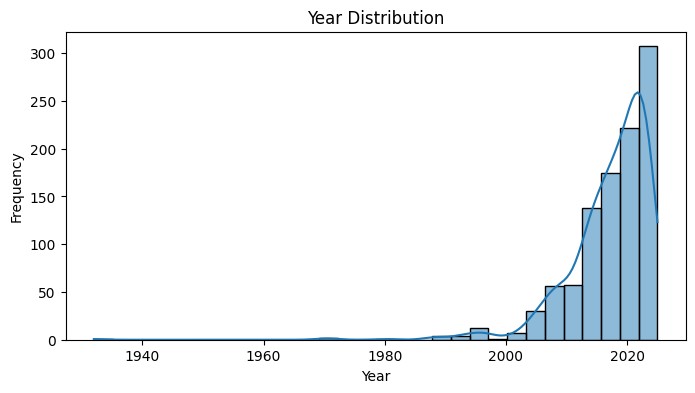

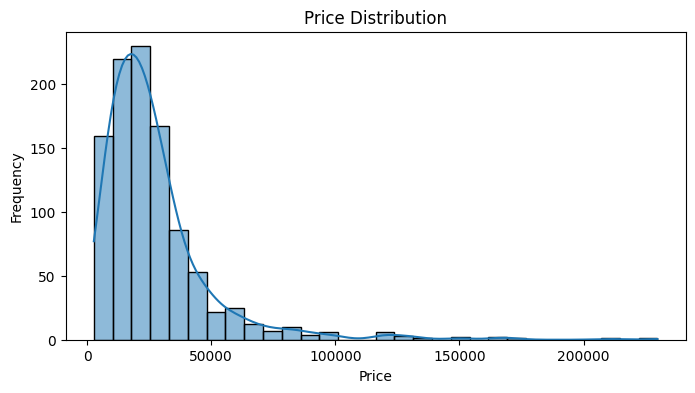

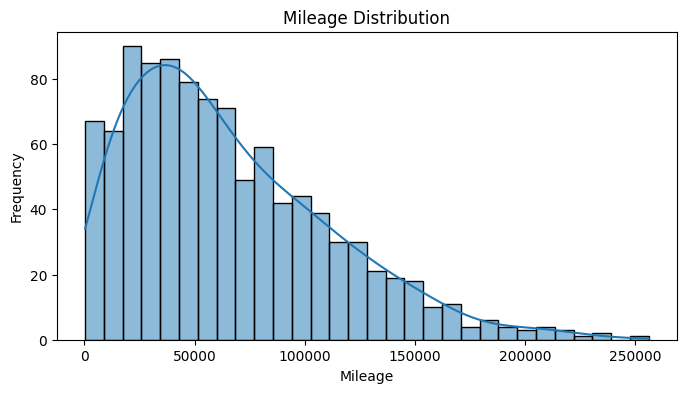

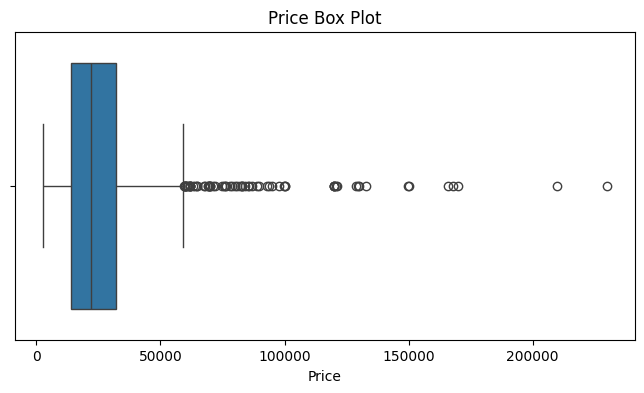

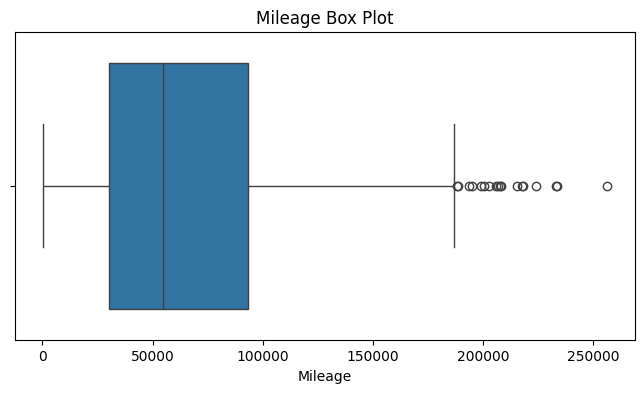

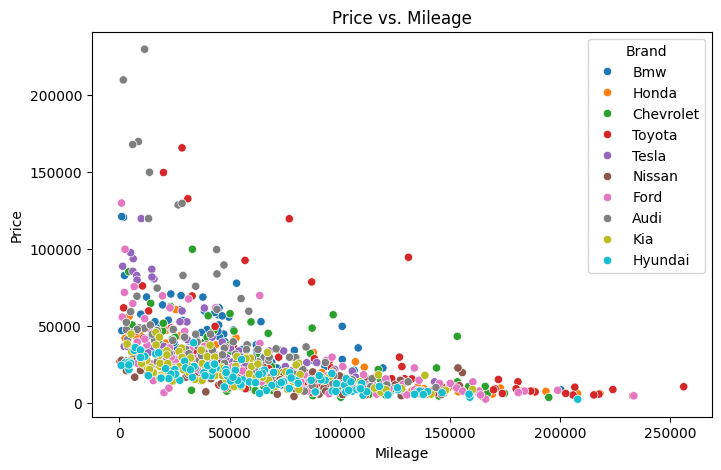

In [6]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("output/scrape_cars_com.csv")

# Display basic info
print("✅ Dataset Info:")
print(df.info(), "\n")

# Summary statistics
print("📊 Summary Statistics:")
print(df.describe(include='all'), "\n")

# Check for missing values
print("🕳️ Missing Values:")
print(df.isnull().sum(), "\n")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"🧹 Duplicate Rows: {duplicates}\n")

# Remove duplicates (optional)
# df.drop_duplicates(inplace=True)

# Visualizations setup
numeric_cols = ['Year', 'Price', 'Mileage']

# Convert price and mileage to numeric
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)
df['Mileage'] = df['Mileage'].replace('[\, mi.]', '', regex=True).astype(float)

# Histogram for numeric columns
for col in ['Year', 'Price', 'Mileage']:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(f"{col} Distribution")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

# Box plots
for col in ['Price', 'Mileage']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Box Plot")
    plt.show()

# Scatter plot - Price vs Mileage
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Brand")
plt.title("Price vs. Mileage")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()


## Preprocessing and Feature Engineering
- Handle missing values.
- Remove duplicates and outliers.
- Apply transformations (scaling, encoding, feature interactions).

In [ ]:
%pip install scikit-learn

In [35]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load data
df = pd.read_csv("output/scrape_cars_com.csv")

# ========== HANDLE MISSING VALUES ==========
print("🔍 Missing values before handling:")
print(df.isnull().sum())

# Drop rows missing essential values
df.dropna(subset=["Title", "Year", "Price", "Mileage"], inplace=True)

# Fill missing string-based columns with "Unknown"
for col in ["Fuel Type", "Transmission", "Drivetrain", "Engine", "MPG"]:
    df[col] = df[col].fillna("Unknown")

# ========== FILTER FUEL TYPE ==========
valid_fuels = ["gasoline", "electric", "hybrid", "plug in hybrid", "diesel"]
df["Fuel Type"] = df["Fuel Type"].apply(
    lambda x: x.lower() if isinstance(x, str) else "unknown"
)
df["Fuel Type"] = df["Fuel Type"].apply(
    lambda x: x if any(fuel in x for fuel in valid_fuels) else "unknown"
)
df["Fuel Type"] = df["Fuel Type"].replace({
    "plug in hybrid": "hybrid"
}).str.title()

# ========== EXTRACT ENGINE SIZE ==========
def extract_engine_size(row):
    fuel = row["Fuel Type"].lower()
    engine = str(row["Engine"]).lower()
    if fuel == "electric":
        return "Electric"
    match = re.search(r'(\d\.\d|\d)(\s)?(l|liter)', engine)
    if match:
        size = float(match.group(1))
        return f"{size:.1f}L"
    return "Unknown"

df["Engine Size"] = df.apply(extract_engine_size, axis=1)

# Drop the messy 'Engine' text column
df.drop(columns=["Engine"], inplace=True)

# ========== GROUP TRANSMISSION TYPES ==========
def group_transmission(trans):
    trans_lower = trans.lower()
    if "manual" in trans_lower:
        return "Manual"
    elif "automatic" in trans_lower or "a/t" in trans_lower:
        return "Automatic"
    else:
        return np.nan  # Remove Other transmissions

df["Transmission"] = df["Transmission"].apply(group_transmission)

# ========== GROUP DRIVETRAIN TYPES ==========
def group_drivetrain(drive):
    drive_lower = drive.lower()
    if "all" in drive_lower or "awd" in drive_lower:
        return "AWD"
    elif "four" in drive_lower or "4wd" in drive_lower or "4x4" in drive_lower:
        return "4WD"
    elif "front" in drive_lower or "fwd" in drive_lower:
        return "FWD"
    elif "rear" in drive_lower or "rwd" in drive_lower:
        return "RWD"
    else:
        return np.nan  # Remove Other drivetrains

df["Drivetrain"] = df["Drivetrain"].apply(group_drivetrain)

# ========== REMOVE DUPLICATES ==========
df.drop_duplicates(inplace=True)

# ========== CLEAN AND TRANSFORM NUMERICAL FIELDS ==========
# Remove rows where Price is "Not Priced" or invalid
df = df[~df["Price"].str.contains("Not Priced", na=False)]
df["Price"] = df["Price"].str.replace("[$,]", "", regex=True).astype(float)
df["Mileage"] = df["Mileage"].str.replace("[^0-9.]", "", regex=True).astype(float)
df["Year"] = df["Year"].astype(int)

# ========== CLEAN MPG ==========
def extract_avg_mpg(mpg_str):
    if "-" in mpg_str:
        low, high = mpg_str.split("-")
        return (float(low.strip()) + float(high.strip())) / 2
    try:
        return float(mpg_str)
    except:
        return np.nan

df["MPG"] = df["MPG"].apply(extract_avg_mpg)
df["MPG"].fillna(df["MPG"].median(), inplace=True)

# ========== REMOVE OUTLIERS ==========
df = df[(df["Mileage"] < 300_000) & (df["Price"] < 200_000)]

# ========== REMOVE UNKNOWN/OTHER ==========
df = df.dropna(subset=["Fuel Type", "Transmission", "Drivetrain", "Engine Size"])
df = df[~df[["Fuel Type", "Transmission", "Drivetrain", "Engine Size"]].isin(["Unknown"]).any(axis=1)]

# ========== FINAL FEATURE SCALING AND ENCODING SETUP ==========
numeric_features = ["Year", "Price", "Mileage", "MPG"]
categorical_features = ["Fuel Type", "Transmission", "Drivetrain", "Brand", "Engine Size"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Apply transformations
X_preprocessed = preprocessor.fit_transform(df)

print("✅ Preprocessing complete.")

# Save cleaned dataset
df.to_csv("output/cleaned_scrape_cars_com.csv", index=False)


🔍 Missing values before handling:
Brand             0
Title             0
Year              0
Price             0
Mileage           0
Fuel Type        26
Transmission      6
Drivetrain       10
MPG             823
Engine           17
dtype: int64
✅ Preprocessing complete.


/var/folders/x4/zl4hfplx0_g_0sjn18gdv2mc0000gq/T/ipykernel_3857/3803883586.py:100: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MPG"].fillna(df["MPG"].median(), inplace=True)



---

# Milestone 2: Advanced Data Analysis and Feature Engineering

## Statistical Analysis
- Conduct tests such as t-tests, ANOVA, and chi-squared to explore relationships.

In [ ]:
%pip install statsmodels


In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
from statsmodels.formula.api import ols
import statsmodels.api as sm

# Load the cleaned dataset
df = pd.read_csv("output/cleaned_scrape_cars_com.csv")

# ========== T-TEST: ELECTRIC vs GASOLINE CAR PRICES ==========
electric_prices = df[df["Fuel Type"].str.lower() == "electric"]["Price"]
gasoline_prices = df[df["Fuel Type"].str.lower() == "gasoline"]["Price"]

t_stat, p_value = ttest_ind(electric_prices, gasoline_prices, equal_var=False)

print("🔍 T-Test (Electric vs Gasoline Prices):")
print(f"T-statistic = {t_stat:.2f}, P-value = {p_value:.4f}\n")

# ========== ANOVA: MPG ACROSS TRANSMISSION TYPES ==========
model = ols("MPG ~ C(Transmission)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("🔬 ANOVA: MPG across Transmission Types")
print(anova_table, "\n")

# ========== CHI-SQUARED TEST: Drivetrain vs Fuel Type ==========
contingency_table = pd.crosstab(df["Drivetrain"], df["Fuel Type"])
chi2, p, dof, _ = chi2_contingency(contingency_table)

print("🧪 Chi-Squared Test (Drivetrain vs Fuel Type):")
print(f"Chi2 = {chi2:.2f}, P-value = {p:.4f}, Degrees of Freedom = {dof}")


🔍 T-Test (Electric vs Gasoline Prices):
T-statistic = 8.14, P-value = 0.0000

🔬 ANOVA: MPG across Transmission Types
                        sum_sq      df          F        PR(>F)
C(Transmission)    1089.206592     1.0  41.522574  1.290683e-10
Residual         115078.349799  4387.0        NaN           NaN 

🧪 Chi-Squared Test (Drivetrain vs Fuel Type):
Chi2 = 496.29, P-value = 0.0000, Degrees of Freedom = 9


## 📊 Interpreting Statistical Analysis Results

This analysis helps us uncover relationships between key variables in the car dataset. Here's what each test reveals and why it matters:

### 🔍 T-Test: Electric vs Gasoline Prices
- **What it tells us:** Whether there’s a statistically significant difference in prices between electric and gasoline cars.
- **Why it matters:** Helps evaluate if electric vehicles (EVs) are priced higher or lower than traditional gasoline cars — crucial for market segmentation, pricing strategy, and consumer behavior analysis.
- **Use case:** A car dealership might use this to understand if EVs are justifiably priced higher, and whether customer education or price alignment is needed.

### 🔬 ANOVA: MPG across Transmission Types
- **What it tells us:** Whether average fuel efficiency (MPG) differs across transmission types (Manual, Automatic, Other).
- **Why it matters:** Provides insight into how the choice of transmission affects efficiency. This could influence manufacturing decisions or highlight which types offer the best balance between performance and fuel economy.
- **Use case:** Marketing teams can highlight the fuel-efficiency advantage of a specific transmission to attract eco-conscious buyers.

### 🧪 Chi-Squared Test: Drivetrain vs Fuel Type
- **What it tells us:** Whether there's an association between drivetrain types (AWD, FWD, etc.) and fuel types (Electric, Gasoline, etc.).
- **Why it matters:** Understanding drivetrain–fuel type relationships can help with product planning. For instance, AWD might be more common in hybrids or gas cars than in EVs.
- **Use case:** Car manufacturers can optimize configurations based on market demands or geographical preferences (e.g., AWD in snowy regions).

---
By identifying these relationships, stakeholders—from data scientists to marketers to manufacturers—can make informed, data-backed decisions that align with trends and user preferences.

## Feature Engineering
- Create derived features based on domain knowledge.
- Apply transformations such as normalization, log scaling, or polynomial features.

In [38]:
# ===============================================
# 📦 FEATURE ENGINEERING (Final Clean Version)
# ===============================================

import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv("output/cleaned_scrape_cars_com.csv")

# ====== Feature Engineering ======

# 1. Engine Size (numeric format)
def parse_engine_size(engine_str):
    if engine_str != "Electric":
        try:
            return float(engine_str.replace("L", ""))
        except:
            return np.nan
    return np.nan  # Electric cars have no engine size

df["Engine Size (L)"] = df["Engine Size"].apply(parse_engine_size)

# Remove original "Engine Size" text column
df.drop(columns=["Engine Size"], inplace=True)

# 2. Log transformations (for normalization)
df["Log Price"] = np.log1p(df["Price"])
df["Log Mileage"] = np.log1p(df["Mileage"])

# 3. Car Age
current_year = pd.Timestamp.now().year
df["Car Age"] = current_year - df["Year"]

# 4. MPG * Engine interaction
df["MPG*Engine"] = df["MPG"] * df["Engine Size (L)"]
df["MPG*Engine"].fillna(0, inplace=True)  # Set 0 for electric cars (no engine size)

# 5. Binary flags for Fuel Type
df["IsElectric"] = df["Fuel Type"].str.lower().apply(lambda x: 1 if "electric" in x else 0)
df["IsHybrid"] = df["Fuel Type"].str.lower().apply(lambda x: 1 if "hybrid" in x else 0)
df["IsGasoline"] = df["Fuel Type"].str.lower().apply(lambda x: 1 if "gasoline" in x else 0)
df["IsDiesel"] = df["Fuel Type"].str.lower().apply(lambda x: 1 if "diesel" in x else 0)

# 6. Low Mileage Flag
df["IsLowMileage"] = df["Mileage"].apply(lambda x: 1 if x < 20000 else 0)

# 7. Target Variable: IsExpensive (Top 25% of prices)
price_threshold = df["Price"].quantile(0.75)
df["IsExpensive"] = df["Price"].apply(lambda x: 1 if x > price_threshold else 0)

# ====== Final Cleanup ======

# Drop rows where critical engineered fields are missing (except Engine Size L)
df.dropna(subset=["Log Price", "Log Mileage", "Car Age"], inplace=True)

# ====== Save ======
df.to_csv("output/engineered_scrape_cars_com.csv", index=False)

print("✅ Feature engineering completed and saved to 'output/engineered_scrape_cars_com.csv'")


✅ Feature engineering completed and saved to 'output/engineered_scrape_cars_com.csv'


/var/folders/x4/zl4hfplx0_g_0sjn18gdv2mc0000gq/T/ipykernel_3857/383541181.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["MPG*Engine"].fillna(0, inplace=True)  # Set 0 for electric cars (no engine size)


## 🔍 Feature Engineering Explanation

Below is a breakdown of the newly engineered columns, along with their purpose and potential benefit in downstream analysis or machine learning:

### 🔧 Numeric Features

- **Engine Size (L):**  
  Extracts numeric engine size (in liters) from descriptive strings.  
  *Purpose:* Helps capture vehicle power and fuel efficiency trends. Often correlated with performance, emissions, and fuel economy.

- **Log Price:**  
  Applies a log transformation to the Price column.  
  *Purpose:* Normalizes price data, reducing skewness and making it more suitable for statistical models or machine learning.

- **Log Mileage:**  
  Applies a log transformation to the Mileage column.  
  *Purpose:* Reduces the impact of high-mileage outliers and better captures the mileage distribution.

- **Car Age:**  
  Calculates how old the car is based on the current year.  
  *Purpose:* Age is a key variable in car depreciation and reliability assessments.


- **MPG*Engine:**  
  Interaction feature combining fuel economy (MPG) and engine size.  
  *Purpose:* Balances performance and efficiency; useful in regression models or clustering.

---

### 🔲 Binary Flag Features

- **IsElectric:**  
  1 if the car is electric, else 0.  
  *Purpose:* Useful for comparing electric cars against traditional fuel types or filtering for EVs.

- **IsHybrid:**  
  1 if the car is hybrid or plug-in hybrid, else 0.  
  *Purpose:* Groups hybrid technologies under one flag for analysis and modeling.

- **IsGasoline:**  
  1 if the car runs on gasoline, else 0.  
  *Purpose:* Enables comparative analysis and segmentation by fuel type.

- **IsDiesel:**  
  1 if the car uses diesel, else 0.  
  *Purpose:* Helps study older or commercial vehicle segments that typically use diesel.

- **IsLowMileage:**  
  1 if mileage is under 20,000 miles.  
  *Purpose:* Flags low-usage vehicles, usually indicating better condition or newer usage.

- **IsExpensive:**  
  1 if the price is in the top 25% percentile.  
  *Purpose:* Identifies luxury or premium pricing tiers and helps in market segmentation.

---

These engineered features enhance interpretability, enable better model performance, and offer deeper insights for both statistical analysis and machine learning workflows.


## Data Visualization
- Generate insightful visualizations:
  - Correlation heatmaps, pair plots.
  - Trends and comparisons using bar charts, line charts, and dashboards.

In [ ]:
%pip install --upgrade nbformat


In [42]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Load feature-engineered dataset
df = pd.read_csv("output/engineered_scrape_cars_com.csv")

# ========== 1. Correlation Heatmap ==========
corr_matrix = df[["Price", "Mileage", "MPG", "Engine Size (L)", "Car Age"]].corr()
heatmap = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale="RdBu_r",
    title="Correlation Heatmap of Key Numerical Features"
)

# ========== 2. Scatter Matrix ==========
scatter_matrix = px.scatter_matrix(
    df,
    dimensions=["Price", "Mileage", "MPG", "Engine Size (L)", "Car Age"],
    color="Fuel Type",
    title="Scatter Matrix of Key Features Colored by Fuel Type",
    height=700
)

# ========== 3. Price Distribution by Transmission Type ==========
box_transmission = px.box(
    df, x="Transmission", y="Price", color="Transmission",
    title="Price Distribution by Transmission Type"
)

# ========== 4. Bar Chart: Average MPG by Fuel Type ==========
avg_mpg_by_fuel = df.groupby("Fuel Type")["MPG"].mean().reset_index()
bar_mpg = px.bar(
    avg_mpg_by_fuel, x="Fuel Type", y="MPG", color="Fuel Type",
    title="Average MPG by Fuel Type"
)

# ========== 5. Line Chart: Average MPG vs Car Age ==========
avg_mpg_by_age = df.groupby("Car Age")["MPG"].mean().reset_index()
line_mpg_age = px.line(
    avg_mpg_by_age, x="Car Age", y="MPG", markers=True,
    title="Average MPG by Car Age"
)

# ========== 6. Count of Listings per Drivetrain ==========
drivetrain_counts = df["Drivetrain"].value_counts().reset_index()
drivetrain_counts.columns = ["Drivetrain", "Count"]
bar_drivetrain = px.bar(
    drivetrain_counts, x="Drivetrain", y="Count", color="Drivetrain",
    title="Listing Count by Drivetrain"
)

# ========== DISPLAY ==========
heatmap.show()
scatter_matrix.show()
box_transmission.show()
bar_mpg.show()
line_mpg_age.show()
bar_drivetrain.show()



---


# Milestone 3: Machine Learning Model Development and Optimization

## Model Selection
- Choose appropriate models for the problem type (classification, regression, clustering, etc.).


In [44]:
## Model Selection
# - Choose appropriate models for the problem type (classification, regression, clustering, etc.).

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load data
df = pd.read_csv("output/engineered_scrape_cars_com.csv")

# Define target and drop irrelevant columns
target = "IsExpensive"
drop_cols = ["Title", "Price", "Log Price"]  # not usable or redundant

X = df.drop(columns=drop_cols + [target])
y = df[target]

print("✅ Features and target defined.")


✅ Features and target defined.


## Model Training
- Split data into training, validation, and testing sets.
- Address imbalances using techniques like SMOTE or stratified sampling.

In [45]:
## Model Training
# - Split data into training, validation, and testing sets.
# - Address imbalances using techniques like SMOTE or stratified sampling.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from collections import Counter

# ===== 1. Load data (already done above, no need again)

# ===== 2. Split Data (70/15/15) stratified
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.15, stratify=y, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.176, stratify=y_train_val, random_state=42
)

# ===== 3. Separate feature types
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# ===== 4. Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# ===== 5. Preprocess only TRAIN set for SMOTE
X_train_processed = preprocessor.fit_transform(X_train)
X_val_processed = preprocessor.transform(X_val)
X_test_processed = preprocessor.transform(X_test)

# ===== 6. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print(f"✅ SMOTE applied. Class distribution after balancing: {Counter(y_train_balanced)}")


✅ SMOTE applied. Class distribution after balancing: Counter({0: 2305, 1: 2305})


## Model Evaluation
- Metrics to consider: Accuracy, Precision, Recall, F1-score, RMSE, etc.
- Visual tools: Confusion matrices, ROC curves.

In [ ]:
## Model Evaluation
# - Metrics: Accuracy, Precision, Recall, F1-score, ROC AUC.
# - Visual tools: Confusion matrices.

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# Store evaluation results
evaluation_results = []

# Evaluate each model
for name, model in models.items():
    print(f"\n🔍 Evaluating: {name}")
    
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)
    
    # Predict on validation set
    y_pred = model.predict(X_val_processed)
    y_proba = model.predict_proba(X_val_processed)[:, 1] if hasattr(model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_val, y_pred)
    prec = precision_score(y_val, y_pred, zero_division=0)
    rec = recall_score(y_val, y_pred, zero_division=0)
    f1 = f1_score(y_val, y_pred, zero_division=0)
    auc = roc_auc_score(y_val, y_proba) if y_proba is not None else None

    evaluation_results.append({
        "Model": name,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "ROC AUC": auc
    })

    # Detailed classification report
    print(classification_report(y_val, y_pred, zero_division=0))

    # Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Display final comparison table
results_df = pd.DataFrame(evaluation_results).sort_values(by="F1-Score", ascending=False)
print("\n📊 Model Comparison:")
display(results_df)



🔍 Evaluating: Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.89      0.93       493
           1       0.73      0.90      0.81       164

    accuracy                           0.89       657
   macro avg       0.85      0.89      0.87       657
weighted avg       0.91      0.89      0.90       657


🔍 Evaluating: Random Forest


/var/folders/x4/zl4hfplx0_g_0sjn18gdv2mc0000gq/T/ipykernel_3857/2077044356.py:62: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



              precision    recall  f1-score   support

           0       0.94      0.95      0.94       493
           1       0.83      0.82      0.83       164

    accuracy                           0.91       657
   macro avg       0.89      0.88      0.89       657
weighted avg       0.91      0.91      0.91       657


📊 Model Comparison:


/var/folders/x4/zl4hfplx0_g_0sjn18gdv2mc0000gq/T/ipykernel_3857/2077044356.py:62: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
1,Random Forest,0.914764,0.833333,0.823171,0.828221,0.956927
0,Logistic Regression,0.893455,0.735000,0.896341,0.807692,0.959506


## Hyperparameter Tuning
- Techniques: Grid Search, Random Search, or advanced methods like Bayesian Optimization.

In [47]:
## Hyperparameter Tuning
# - Grid search for best model parameters.

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Grids for both models
param_grids = {
    "Logistic Regression": {
        "model__C": [0.01, 0.1, 1, 10],
        "model__penalty": ["l2"],
        "model__solver": ["lbfgs"]
    },
    "Random Forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [None, 10, 20],
        "model__min_samples_split": [2, 5]
    }
}

# Best models storage
best_models = {}

for name, model in models.items():
    print(f"\n🔧 Tuning hyperparameters for {name}...")

    pipeline = Pipeline(steps=[
        ("model", model)
    ])

    grid_search = GridSearchCV(
        pipeline,
        param_grids[name],
        cv=5,
        scoring="f1",
        n_jobs=-1
    )

    # Fit on SMOTE-balanced training set
    grid_search.fit(X_train_balanced, y_train_balanced)

    best_models[name] = grid_search.best_estimator_

    print(f"✅ Best Params for {name}: {grid_search.best_params_}")
    print(f"📈 Best Cross-Validation F1-Score: {grid_search.best_score_:.4f}")



🔧 Tuning hyperparameters for Logistic Regression...
✅ Best Params for Logistic Regression: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
📈 Best Cross-Validation F1-Score: 0.8990

🔧 Tuning hyperparameters for Random Forest...
✅ Best Params for Random Forest: {'model__max_depth': 20, 'model__min_samples_split': 5, 'model__n_estimators': 100}
📈 Best Cross-Validation F1-Score: 0.9387


## Model Comparison
- Compare multiple models and justify the final model selection.

In [48]:
## Model Comparison
# - Compare multiple models and justify the final model selection.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create table to store comparison metrics
comparison_results = []

for name, model in best_models.items():
    y_pred = model.predict(X_val_processed)
    y_proba = model.predict_proba(X_val_processed)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    auc = roc_auc_score(y_val, y_proba) if y_proba is not None else None

    comparison_results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC AUC": auc
    })

    # Plot Confusion Matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()
    plt.show()

# Display model comparison summary
comparison_df = pd.DataFrame(comparison_results).sort_values(by="F1-Score", ascending=False)
print("\n🔍 Model Comparison Results:")
display(comparison_df)



🔍 Model Comparison Results:


/var/folders/x4/zl4hfplx0_g_0sjn18gdv2mc0000gq/T/ipykernel_3857/2285753140.py:39: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown

/var/folders/x4/zl4hfplx0_g_0sjn18gdv2mc0000gq/T/ipykernel_3857/2285753140.py:39: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



,Model,Accuracy,Precision,Recall,F1-Score,ROC AUC
0,Logistic Regression,0.894977,0.746114,0.878049,0.806723,0.960422
1,Random Forest,0.898021,0.801242,0.786585,0.793846,0.958399


In [49]:
# ## Save Final Random Forest Model
# - Using final selected features.
# - Matching the current cleaned + feature-engineered dataset.

import pandas as pd
import joblib
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Load engineered dataset
df = pd.read_csv("output/engineered_scrape_cars_com.csv")

# Final selected features (reflecting cleaned and feature engineered dataset)
final_features = [
    "Brand", "Fuel Type", "Transmission", "Drivetrain",
    "Year", "Mileage", "MPG", "Engine Size (L)",
    "MPG*Engine", "Log Mileage",
    "IsElectric", "IsHybrid", "IsGasoline", "IsDiesel", "IsLowMileage"
]

X_final = df[final_features]
y_final = df["IsExpensive"]

# Drop rows with missing values
final_data = pd.concat([X_final, y_final], axis=1).dropna()
X_final_clean = final_data[final_features]
y_final_clean = final_data["IsExpensive"]

# Define numeric, categorical, and binary features
numeric_features = ["Year", "Mileage", "MPG", "Engine Size (L)", "MPG*Engine", "Log Mileage"]
categorical_features = ["Brand", "Fuel Type", "Transmission", "Drivetrain"]
binary_features = ["IsElectric", "IsHybrid", "IsGasoline", "IsDiesel", "IsLowMileage"]

# Preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features),
    ("bin", "passthrough", binary_features)
])

# Train final model (Random Forest with optimized parameters)
final_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=200,
        max_depth=20,
        min_samples_split=2,
        random_state=42
    ))
])

# Fit on full cleaned data
final_model.fit(X_final_clean, y_final_clean)

# Save model
joblib.dump(final_model, "output/random_forest_model.pkl")
print("✅ Final model trained and saved as 'output/random_forest_model.pkl'")


✅ Final model trained and saved as 'output/random_forest_model.pkl'


## Visualization for Research Questions
- This section will include the visualizations that provide insights for the research questions defined earlier.  
- **Development Steps for Answering the Research Questions**:
  1. During **Exploratory Data Analysis (EDA)**, visualize initial patterns or trends related to the research questions.
  2. During **Model Evaluation**, provide visualizations to interpret model performance with respect to the research questions.
  3. During the **Final Analysis and Reporting**, present polished visualizations that summarize findings for each research question.

- Create the visualizations for each research question you defined, prove it or answer it, then add a markdown cell after each visual to comment and explain how the visual support your research question.

🧪 **Research Question 1:**
Does mileage significantly affect car price across brands?

In [15]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("output/engineered_scrape_cars_com.csv")

fig_mileage_price = px.scatter(
    df, x="Mileage", y="Price", color="Brand",
    title="Mileage vs Price by Brand",
    labels={"Mileage": "Mileage", "Price": "Price ($)"},
    trendline="ols", log_y=True, opacity=0.6, height=500
)
fig_mileage_price.show()


**Interpretation:**  
This scatter plot shows that as mileage increases, car prices tend to drop, although the trend varies by brand. The trendlines help visualize this negative correlation. Luxury brands generally retain higher prices even at higher mileage, while economy brands depreciate more quickly.


🔋 **Research Question 2:**
Are electric and hybrid cars priced competitively compared to gasoline and diesel cars?

In [16]:
fig_price_fuel = px.box(
    df, x="Fuel Type", y="Price",
    title="Price Comparison by Fuel Type",
    color="Fuel Type",
    points="all", log_y=True,
    labels={"Fuel Type": "Fuel Type", "Price": "Price ($)"}
)
fig_price_fuel.show()


**Interpretation:**  
Electric and hybrid vehicles generally fall in the mid-to-high price range, with electric cars occasionally spiking into premium territory. This suggests that while electric vehicles can be competitively priced, many are positioned as higher-end models compared to gasoline or diesel alternatives.


⚙️ **Research Question 3:**
How does transmission type impact fuel efficiency (MPG)?

In [ ]:
fig_mpg_trans = px.box(
    df, x="Transmission", y="MPG",
    title="Fuel Efficiency (MPG) by Transmission Type",
    color="Transmission",
    points="all",
    labels={"Transmission": "Transmission Type", "MPG": "Miles per Gallon"}
)
fig_mpg_trans.show()


**Interpretation:**  
Automatic transmissions show a wider range of fuel efficiency, likely due to a mix of vehicle sizes and engine types. Manuals tend to have slightly better MPG on average in this dataset, possibly reflecting a concentration in smaller, economy-focused cars.

💰 **Research Question 4:**
What combination of features best predicts whether a car is considered expensive (top 25%)?

In [14]:
import plotly.figure_factory as ff

# Select relevant columns
corr_cols = [
    "Price", "Year", "Mileage", "MPG", "Engine Size (L)", "Car Age",
    "IsElectric", "IsHybrid", "IsNewCar", "IsLowMileage",
    "Price_per_Mile", "MPG*Engine", "IsExpensive"
]
corr_matrix = df[corr_cols].corr().round(2)

# Convert correlation matrix to Plotly heatmap
fig_corr = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns.tolist(),
    y=corr_matrix.index.tolist(),
    colorscale="YlGnBu",
    showscale=True,
    hoverinfo="z"
)
fig_corr.update_layout(title_text="Correlation Heatmap (w/ IsExpensive)", height=700)
fig_corr.show()


**Interpretation:**  
The heatmap reveals that high engine size, low mileage, and newer car age are positively associated with the "IsExpensive" label. MPG is negatively correlated, suggesting that more fuel-efficient cars are generally less expensive. This supports the idea that premium vehicles tend to have bigger engines and lower usage.


---


# Milestone 4: Deployment and Monitoring

## Deployment
- Deploy the model as a REST API (Flask, FastAPI) or interactive dashboards (Streamlit, Dash).
- Host on cloud platforms (AWS, Azure, GCP) or local servers.

In [26]:
import pandas as pd
from collections import Counter

df = pd.read_csv("output/engineered_scrape_cars_com.csv")
print(Counter(df["IsExpensive"]))


Counter({0: 3477, 1: 1158})


In [6]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

# Load dataset
df = pd.read_csv("output/engineered_scrape_cars_com.csv")

# ===== Define Features and Target =====
X = df.drop(columns=["IsExpensive", "Price", "Title"])
y = df["IsExpensive"]

# Drop rows with missing values in X
X = X.dropna()
y = y.loc[X.index]  # Match the filtered indices

# ===== Feature Separation =====
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object"]).columns.tolist()

# ===== Preprocessing =====
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("num", numeric_transformer, numeric_features),
    ("cat", categorical_transformer, categorical_features)
])

# ===== Random Forest Model Pipeline =====
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", RandomForestClassifier(n_estimators=100, random_state=42))
])

# ===== Train/Test Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===== Train and Export Model =====
rf_model.fit(X_train, y_train)
joblib.dump(rf_model, "output/random_forest_model.pkl")

print("✅ Model trained and saved as output/random_forest_model.pkl")


✅ Model trained and saved as output/random_forest_model.pkl


## Monitoring
- Set up performance tracking and alert systems for issues.
- Monitor metrics for potential model drift or anomalies.

## Retraining Strategy
- Plan for periodic retraining with new or updated data.


---


# Milestone 5: Final Documentation and Presentation

## Final Report
- Summarize all project phases, including methodologies and insights.
- Provide actionable recommendations based on findings.

## Final Presentation
- Create a presentation for stakeholders, highlighting key results.
- Include a demo of the deployed application or model.

## Future Improvements
- Suggest areas for enhancement:
  - Incorporating more diverse data.
  - Experimenting with additional algorithms.
  - Optimizing deployment for scalability.

---

# Additional Sections

## Challenges Faced
- Document key challenges encountered during the project lifecycle.

## Lessons Learned
- Reflect on insights and skills gained through the project.

## References
- List resources for datasets, tools, and techniques utilized.

---

# More Sections for Specific Projects

## Ethical Considerations
- Discuss privacy, fairness, or other ethical implications.

## Business Impact
- Highlight how the findings address the original objective.

## Team Contributions
- Acknowledge contributions from team members and collaborators.


---


# Reflection: Data Science Lifecycle Steps and Big Data

Reflect on which steps of the data science lifecycle can and cannot be effectively applied to big data, and justify your answers:

## Steps That Can Be Used with Big Data

Create a list for the steps that can be used with big data with how each step can be used, why is such step applicable and an example tool used for such step in big data world.

Include tools, methods, or technologies that make these steps scalable.

## Steps That Are Challenging with Big Data

Create a list for the steps that are challenging with big data with the solution for the challenge, why is such step challenging and an example tool used for such step in big data world.

Explain why these steps are difficult and suggest potential solutions.

## Recommendations for Big Data Projects

Create a list for the recommendations you have for other data scientists willing to take your project with a big data approach.

---